# Spoken Digit Experiment for Progressive Learning
<br>

This experiment will use an audio dataset named **spoken_digit** to test the performance of progressive-learning on audio classification tasks. The dataset consists of 3,000 recordings of digit (from 0 to 9) pronounced in English, by 6 speakers: 

*6 (speakers) x 10 (digits) x 50 (repetitions) = 3,000 (audio files)*

Think MNIST for audio.


### Import necessary packages and modules

In [1]:
import numpy as np
import IPython.display as ipd

### Load spoken_digit data and extract features
To try on the up-to-date version of spoken_digit, we download the dataset from github repo (https://github.com/Jakobovski/free-spoken-digit-dataset) to our computer.

Then we use **librosa** to load audio file, and extract the **STFT** (Short-time Fourier transform) feature. Since each audio has different durations, the STFT spectrograms vary in width. For convenience, we regularize the STFT spectrograms all to 28 by 28 images, using function provided by **opencv**. 

*Please ensure that you have **librosa** and **opencv** installed to run this experiment.*

---
After running the block below, you will get:

`AudioData`: List of audio data, each item contains audio samples of a single digit. length = 3000

`X_spec_mini`: Numpy array of STFT spectrograms that have been resized to 28 by 28 image. shape = (3000, 28, 28)

`Y_number`: Numpy array of labels indicating which digit is spoken. shape = (3000,)

`Y_speaker`: Numpy array of first letter of the speaker. shape = (3000,)

In [2]:
from spoken_digit_functions import load_spoken_digit

path_recordings = 'D:/Python Exploration/free-spoken-digit-dataset/recordings'

AudioData , X_spec_mini, Y_number, Y_speaker = load_spoken_digit(path_recordings)

### Inspect data

Before running progressive learning, let's take a look at our audio data and spectrograms.

First, let's play some audio of the digits!

In [3]:
num = 2999 # choose from 0 to 2999

print('This is a number',Y_number[num],'spoken by speaker',Y_speaker[num].upper(),
      '\nDuration:',AudioData[num].shape[0],
      'samples in',AudioData[num].shape[0]/8000,'seconds')

ipd.Audio(AudioData[num], rate=8000)

This is a number 9 spoken by speaker Y 
Duration: 3507 samples in 0.438375 seconds


Now, let's display STFT spectrograms of a same digit spoken by different speakers, and see if there is any distinguishable differences.

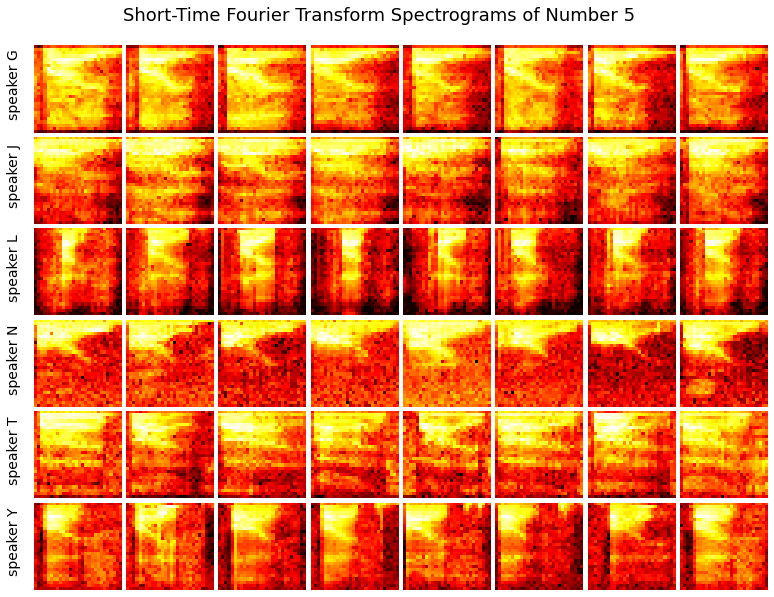

In [4]:
from spoken_digit_functions import display_spectrogram

num = 5 # choose from 0 to 9
display_spectrogram(X_spec_mini, Y_number, Y_speaker, num)

### Run progressive learning

We divide tasks by speaker. As there are 6 speakers in total, we have 6 tasks. For each task, we check whether the former tasks would forward-transfer knowledge to it, as well as whether the later tasks would backward-transfer knowledge to it, so that it has increased accuracy with more task seen.

Here are the major steps:
1. Shuffle the speakers.
2. Pick the first speaker. Split data into train set and test set. Add the first progressive learning task and learn on the train set. Make predictions on the test set. 
3. One by one, the rest of the speakers come as train data. We add transformers, and backpropagate to the first task. Make predictions on the test set in step 2, using task 1.
4. Repeat hundreds of times to reduce noice.

In [5]:
# Flattening
X_all = np.array(X_spec_mini).reshape(3000,-1) # (3000, 784)
Y_all = np.array(Y_number).astype(int) # (3000,)
Y_all_speaker = np.array(Y_speaker) # (3000,), type: string

In [6]:
from spoken_digit_functions import run_experiment

ntrees = 19
model = 'uf'
num_repetition = 20

accuracy_all_task = run_experiment(X_all, Y_all, Y_all_speaker, ntrees, model, num_repetition)

1 time repetition
2 time repetition
3 time repetition
4 time repetition
5 time repetition
6 time repetition
7 time repetition
8 time repetition
9 time repetition
10 time repetition
11 time repetition
12 time repetition
13 time repetition
14 time repetition
15 time repetition
16 time repetition
17 time repetition
18 time repetition
19 time repetition
20 time repetition


### Calculate and plot transfer efficiency

$$BTE_n^t (f) := \mathbb{E} [R^t (f(D_n^{<t}))] / \mathbb{E} [R^t (f(D_n))]$$

In [7]:
from spoken_digit_functions import calculate_results

acc, bte, fte, te = calculate_results(accuracy_all_task)

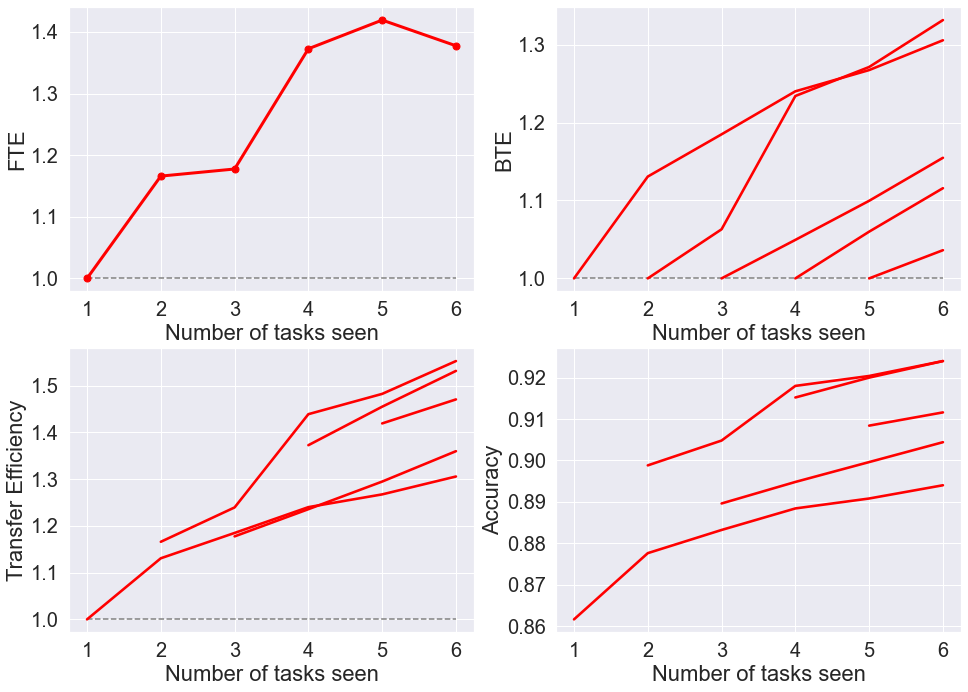

In [8]:
from spoken_digit_functions import plot_results
plot_results(acc, bte, fte, te)